In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import os
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import random
import keras_tuner as kt
import plotly.graph_objs as go
import dash


/home/hduser/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-05-19 22:49:22.972976: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 22:49:22.977931: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 22:49:23.076010: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 22:49:24.254406: W

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp, col
from pyspark.sql.functions import col, count, when, isnan
from pyspark.sql.functions import to_timestamp, col
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from pyspark.sql.functions import udf, col
from pyspark.sql.types import DoubleType
from dotenv import load_dotenv
from os import getenv
from pymongo import MongoClient
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from dash import dcc, html
from dash.dependencies import Input, Output


In [3]:
# Data manipulation

from skforecast.datasets import fetch_dataset

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
import shap

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

print('Skforecast version: ', skforecast.__version__)

Skforecast version:  0.12.0


In [4]:
#!pip install python-dotenv

###   Ycsb workload test isualasition

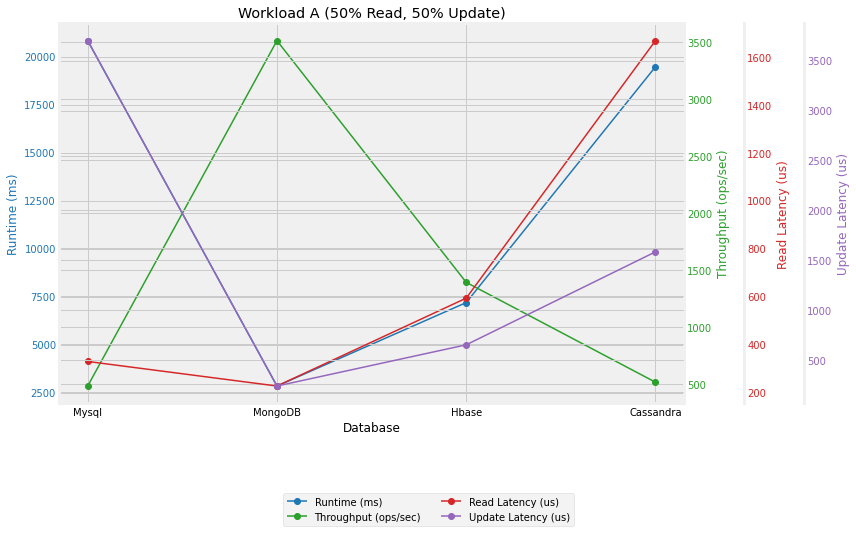

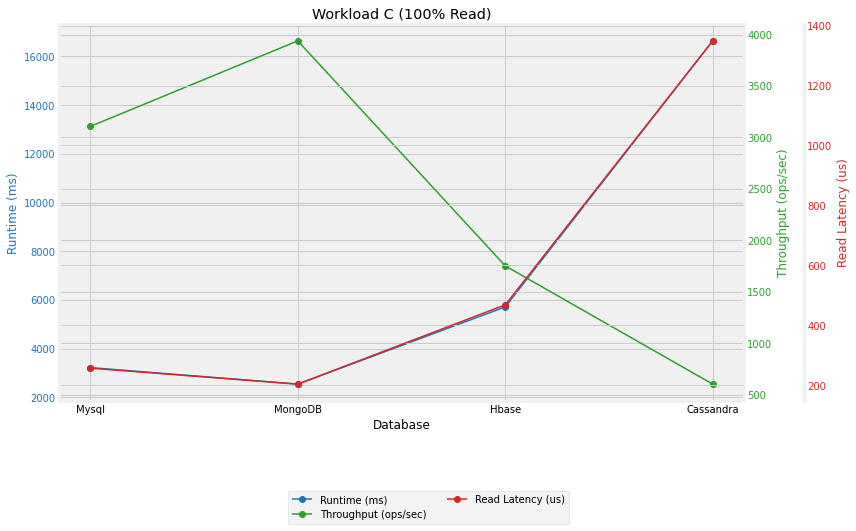

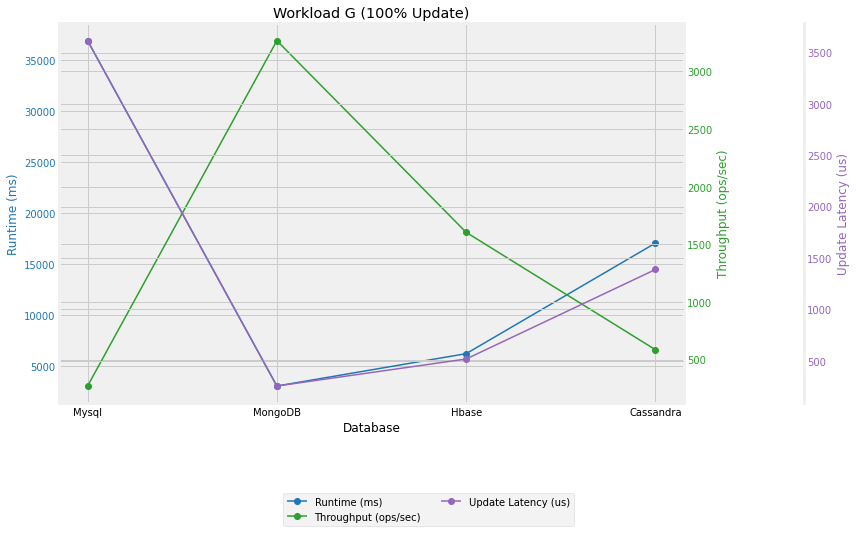

In [5]:
# Data dictionaries
workload_a = {
    "Mysql": {
        "Overall": {"RunTime(ms)": 20834, "Throughput(ops/sec)": 479.98464049150425},
        "Read": {"AverageLatency(us)": 327.5393975663275},
        "Update": {"AverageLatency(us)": 3699.5073190294765},
    },
    "MongoDB": {
        "Overall": {"RunTime(ms)": 2847, "Throughput(ops/sec)": 3512.4692658939234},
        "Read": {"AverageLatency(us)": 224.8214143028366},
        "Update": {"AverageLatency(us)": 240.46976371645974},
    },
    "Hbase": {
        "Overall": {"RunTime(ms)": 7193, "Throughput(ops/sec)": 1390.2405116085083},
        "Read": {"AverageLatency(us)": 592.2613135762915},
        "Update": {"AverageLatency(us)": 653.2994406711946},
    },
    "Cassandra": {
        "Overall": {"RunTime(ms)": 19473, "Throughput(ops/sec)": 513.5315565141478},
        "Read": {"AverageLatency(us)": 1668.619826367858},
        "Update": {"AverageLatency(us)": 1584.5757875965921},
    },
}

workload_c = {
    "Mysql": {
        "Overall": {"RunTime(ms)": 3219, "Throughput(ops/sec)": 3106.5548306927617},
        "Read": {"AverageLatency(us)": 256.5561},
    },
    "MongoDB": {
        "Overall": {"RunTime(ms)": 2539, "Throughput(ops/sec)": 3938.5584875935406},
        "Read": {"AverageLatency(us)": 203.2064},
    },
    "Hbase": {
        "Overall": {"RunTime(ms)": 5712, "Throughput(ops/sec)": 1750.7002801120448},
        "Read": {"AverageLatency(us)": 467.9672},
    },
    "Cassandra": {
        "Overall": {"RunTime(ms)": 16640, "Throughput(ops/sec)": 600.9615384615385},
        "Read": {"AverageLatency(us)": 1349.2411},
    },
}

workload_g = {
    "Mysql": {
        "Overall": {"RunTime(ms)": 36907, "Throughput(ops/sec)": 270.9513100495841},
        "Update": {"AverageLatency(us)": 3615.836},
    },
    "MongoDB": {
        "Overall": {"RunTime(ms)": 3061, "Throughput(ops/sec)": 3266.906239790918},
        "Update": {"AverageLatency(us)": 254.0258},
    },
    "Hbase": {
        "Overall": {"RunTime(ms)": 6234, "Throughput(ops/sec)": 1604.1065126724413},
        "Update": {"AverageLatency(us)": 517.1802},
    },
    "Cassandra": {
        "Overall": {"RunTime(ms)": 17068, "Throughput(ops/sec)": 585.8917272088119},
        "Update": {"AverageLatency(us)": 1388.5628},
    },
}

# Function to plot line charts for different variables in a workload
def plot_workload_line_chart(workload, title):
    db_names = list(workload.keys())
    runtime = [workload[db]["Overall"]["RunTime(ms)"] for db in db_names]
    throughput = [workload[db]["Overall"]["Throughput(ops/sec)"] for db in db_names]

    read_latency = []
    update_latency = []

    if "Read" in workload[db_names[0]]:
        read_latency = [workload[db]["Read"]["AverageLatency(us)"] for db in db_names]

    if "Update" in workload[db_names[0]]:
        update_latency = [workload[db]["Update"]["AverageLatency(us)"] for db in db_names]

    x = np.arange(len(db_names))

    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Database')
    ax1.set_ylabel('Runtime (ms)', color=color)
    ax1.plot(db_names, runtime, color=color, marker='o', label='Runtime (ms)')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Throughput (ops/sec)', color=color)
    ax2.plot(db_names, throughput, color=color, marker='o', label='Throughput (ops/sec)')
    ax2.tick_params(axis='y', labelcolor=color)

    if read_latency:
        ax3 = ax1.twinx()
        ax3.spines['right'].set_position(('outward', 60))
        color = 'tab:red'
        ax3.set_ylabel('Read Latency (us)', color=color)
        ax3.plot(db_names, read_latency, color=color, marker='o', label='Read Latency (us)')
        ax3.tick_params(axis='y', labelcolor=color)

    if update_latency:
        ax4 = ax1.twinx()
        ax4.spines['right'].set_position(('outward', 120))
        color = 'tab:purple'
        ax4.set_ylabel('Update Latency (us)', color=color)
        ax4.plot(db_names, update_latency, color=color, marker='o', label='Update Latency (us)')
        ax4.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(title)
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.show()

# Plotting the workloads with line charts
plot_workload_line_chart(workload_a, 'Workload A (50% Read, 50% Update)')
plot_workload_line_chart(workload_c, 'Workload C (100% Read)')
plot_workload_line_chart(workload_g, 'Workload G (100% Update)')

# 1 Exploratory Data Analysis

In [6]:


# Create a SparkSession with specific application name and configuration
spark = SparkSession.builder \
    .appName("ProjectTweetsProcessing") \
    .config("spark.master", "local[8]") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()

# Specify a list of column names
columns = ["id", "timestamp", "date", "query", "user", "message"]

# Read a CSV file using spark.read.csv and specify custom column names
df = spark.read.csv("hdfs:///user1/ProjectTweets.csv", sep=",", header=False, inferSchema=True).toDF(*columns)

# Display the first 5 rows without truncating
df.show(5, truncate=False)

# Print the schema of the DataFrame
df.printSchema()


24/05/19 22:49:28 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|id |timestamp |date                        |query   |user           |message                                                                                                            |
+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|0  |1467810369|Mon Apr 06 22:19:45 PDT 2009|NO_QUERY|_TheSpecialOne_|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|
|1  |1467810672|Mon Apr 06 22:19:49 PDT 2009|NO_QUERY|scotthamilton  |is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!    |
|2  |1467810917|Mon Apr 06 22:19:53 PDT 2009|NO_QUERY|mattycus   

In [7]:
# Find unique values for query and user
unique_query = df.select("query").distinct()
unique_query.show()

unique_users = df.select("user").distinct()
print("Number of unique users:", unique_users.count())

# Drop the id column
df = df.drop("id")

# Rename columns
df = df.withColumnRenamed("timestamp", "Id") \
       .withColumnRenamed("date", "Date") \
       .withColumnRenamed("query", "Flag") \
       .withColumnRenamed("user", "User") \
       .withColumnRenamed("message", "Text")

# Display the modified DataFrame
df.show()


+--------+
|   query|
+--------+
|NO_QUERY|
+--------+



Number of unique users: 659775
+----------+--------------------+--------+---------------+--------------------+
|        Id|                Date|    Flag|           User|                Text|
+----------+--------------------+--------+---------------+--------------------+
|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4Hollywood|@Tatiana_K nope t...|
|14678120

In [8]:
df.printSchema()
print("Number of rows:", df.count())
print("Columns:", df.columns)

root
 |-- Id: long (nullable = true)
 |-- Date: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Text: string (nullable = true)



Number of rows: 1600000
Columns: ['Id', 'Date', 'Flag', 'User', 'Text']


In [9]:
# Descriptive statistics
df.describe().show()

24/05/19 22:49:46 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+--------------------+--------+--------------------+--------------------+
|summary|                  Id|                Date|    Flag|                User|                Text|
+-------+--------------------+--------------------+--------+--------------------+--------------------+
|  count|             1600000|             1600000| 1600000|             1600000|             1600000|
|   mean|1.9988175522956276E9|                null|    null| 4.325887521835714E9|                null|
| stddev|1.9357607362268043E8|                null|    null|5.162733218454890...|                null|
|    min|          1467810369|Fri Apr 17 20:30:...|NO_QUERY|        000catnap000|                 ...|
|    max|          2329205794|Wed May 27 07:27:...|NO_QUERY|          zzzzeus111|ï¿½ï¿½ï¿½ï¿½ï¿½ß§...|
+-------+--------------------+--------------------+--------+--------------------+--------------------+



In [10]:


# Identify duplicate rows
duplicates_marker = df.groupBy("Date", "User", "Text").agg(count("*").alias("count")).filter("count > 1")

# Display duplicate rows
duplicates = df.join(duplicates_marker, ["Date", "User", "Text"])
duplicates.show()


24/05/19 22:50:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/19 22:50:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/19 22:50:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/19 22:50:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/19 22:50:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+--------------------+---------------+--------------------+----------+--------+-----+
|                Date|           User|                Text|        Id|    Flag|count|
+--------------------+---------------+--------------------+----------+--------+-----+
|Fri Apr 17 21:27:...|quietyourcackle|productive friday...|1548613622|NO_QUERY|    2|
|Fri Apr 17 21:27:...|quietyourcackle|productive friday...|1548613624|NO_QUERY|    2|
|Fri Apr 17 21:32:...|   MissLaura317|@xoh_snap June 16...|1548641597|NO_QUERY|    2|
|Fri Apr 17 21:32:...|   MissLaura317|@xoh_snap June 16...|1548641597|NO_QUERY|    2|
|Fri Jun 05 10:47:...|      DanyCarey|@MariahCarey OMG....|2045482519|NO_QUERY|    2|
|Fri Jun 05 10:47:...|      DanyCarey|@MariahCarey OMG....|2045482519|NO_QUERY|    2|
|Fri Jun 05 16:20:...|        JoBeanz|:-/   :-?=my mood...|2049125647|NO_QUERY|    2|
|Fri Jun 05 16:20:...|        JoBeanz|:-/   :-?=my mood...|2049125647|NO_QUERY|    2|
|Fri Jun 05 16:40:...|AntoniiaAgurtii|@itsaboutEmily y

In [11]:

df = df.dropDuplicates(['Date', 'User', 'Text'])

# Display the cleaned data
print("Data after removing duplicates:")
df.show()


Data after removing duplicates:


+----------+--------------------+--------+---------------+--------------------+
|        Id|                Date|    Flag|           User|                Text|
+----------+--------------------+--------+---------------+--------------------+
|1548275856|Fri Apr 17 20:30:...|NO_QUERY|      WampusKat|@chriswhill sweet...|
|1548277792|Fri Apr 17 20:31:...|NO_QUERY|       leabella|Actually I had 50...|
|1548281512|Fri Apr 17 20:31:...|NO_QUERY|         ajm04m|Rabbit ran in fro...|
|1548281678|Fri Apr 17 20:31:...|NO_QUERY|   shawneespice|Is heading to bed...|
|1548282139|Fri Apr 17 20:31:...|NO_QUERY|       MiniBean|@mattrupp Unfortu...|
|1548282562|Fri Apr 17 20:31:...|NO_QUERY|      lisha4886|@nick_carter http...|
|1548282633|Fri Apr 17 20:31:...|NO_QUERY|       toofrank|@TheWordsmith @so...|
|1548284271|Fri Apr 17 20:32:...|NO_QUERY|Flyinwatermelon|@lillyputian sigh...|
|1548284893|Fri Apr 17 20:32:...|NO_QUERY|     classyPYNK|@DjWhutItDew shee...|
|1548284923|Fri Apr 17 20:32:...|NO_QUER

In [12]:
def print_dataframe_shape(df):
    num_rows = df.count()
    num_columns = len(df.columns)
    print(f"DataFrame has {num_rows} rows and {num_columns} columns.")

print_dataframe_shape(df)


DataFrame has 1598127 rows and 5 columns.


In [13]:
# Check for missing values in each column
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+----+----+----+----+
| Id|Date|Flag|User|Text|
+---+----+----+----+----+
|  0|   0|   0|   0|   0|
+---+----+----+----+----+



In [14]:
df.select('Date').show(truncate=False)

+----------------------------+
|Date                        |
+----------------------------+
|Mon Apr 06 22:38:26 PDT 2009|
|Mon Apr 06 22:47:56 PDT 2009|
|Mon Apr 06 23:17:54 PDT 2009|
|Mon Apr 06 23:27:48 PDT 2009|
|Mon Apr 06 23:47:36 PDT 2009|
|Tue Apr 07 00:31:00 PDT 2009|
|Tue Apr 07 00:43:43 PDT 2009|
|Tue Apr 07 00:45:04 PDT 2009|
|Tue Apr 07 01:17:14 PDT 2009|
|Tue Apr 07 01:20:19 PDT 2009|
|Tue Apr 07 01:36:39 PDT 2009|
|Tue Apr 07 02:17:53 PDT 2009|
|Tue Apr 07 02:25:50 PDT 2009|
|Tue Apr 07 02:52:08 PDT 2009|
|Tue Apr 07 02:58:04 PDT 2009|
|Tue Apr 07 02:59:12 PDT 2009|
|Tue Apr 07 03:26:28 PDT 2009|
|Tue Apr 07 03:53:52 PDT 2009|
|Tue Apr 07 03:59:11 PDT 2009|
|Tue Apr 07 04:48:45 PDT 2009|
+----------------------------+
only showing top 20 rows



In [15]:


# Use the to_timestamp function to convert string date-time to Spark timestamp type with timezone information
df = df.withColumn('Date', to_timestamp(col('Date'), 'EEE MMM dd HH:mm:ss zzz yyyy'))


df.show(truncate=False)


+----------+-------------------+--------+---------------+--------------------------------------------------------------------------------------------------------------------------------------+
|Id        |Date               |Flag    |User           |Text                                                                                                                                  |
+----------+-------------------+--------+---------------+--------------------------------------------------------------------------------------------------------------------------------------+
|1548275856|2009-04-18 04:30:45|NO_QUERY|WampusKat      |@chriswhill sweet!  Josh is at work though                                                                                            |
|1548277792|2009-04-18 04:31:04|NO_QUERY|leabella       |Actually I had 503   maybe I should put my web cam on                                                                                 |
|1548281512|2009-04-18 04:31:38|NO_

In [16]:


# Download NLTK stopwords and tokenizer data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Initialize stemmer and stopwords list
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

# Define preprocess_text function
def preprocess_text(text):
    if text:
        # Convert text to lowercase
        text = text.lower()
        # Remove special characters, punctuation, and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize the text
        words = nltk.word_tokenize(text)
        # Remove stopwords and apply stemming
        filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
        return " ".join(filtered_words)
    return ""

# Register preprocess_text function as a UDF
preprocess_text_udf = udf(preprocess_text, StringType())

# Apply preprocessing UDF to the comments text
df = df.withColumn("Preprocessed Comment", preprocess_text_udf(col("Text")))

# Display the DataFrame with preprocessed comments and converted date
df.show(truncate=False)


[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/hduser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hduser/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


+----------+-------------------+--------+---------------+--------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------+
|Id        |Date               |Flag    |User           |Text                                                                                                                                  |Preprocessed Comment                                                                                  |
+----------+-------------------+--------+---------------+--------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------+
|1548275856|2009-04-18 04:30:45|NO_QUERY|WampusKat      |@chriswhill sweet!  Josh is at work though             

In [17]:
 print_dataframe_shape(df)

DataFrame has 1598127 rows and 6 columns.


In [18]:

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define the sentiment_analysis function
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return float(sentiment['compound'])  # The 'compound' value represents the overall sentiment polarity

# Register the sentiment_analysis function as a UDF
analyze_sentiment_udf = udf(analyze_sentiment, DoubleType())

# Apply sentiment analysis to the preprocessed comments
df = df.withColumn("Sentiment Polarity", analyze_sentiment_udf(col("Preprocessed Comment")))

# Display the data after preprocessing text and sentiment analysis
print("Data after preprocessing text and sentiment analysis:")
df.show(truncate=False)


Data after preprocessing text and sentiment analysis:


+----------+-------------------+--------+---------------+--------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------+------------------+
|Id        |Date               |Flag    |User           |Text                                                                                                                                  |Preprocessed Comment                                                                                  |Sentiment Polarity|
+----------+-------------------+--------+---------------+--------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------+------------------+
|1548275856|2009-04-18 04:30:45|NO_QUERY|WampusKat     

In [19]:
df.printSchema()

root
 |-- Id: long (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Flag: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Preprocessed Comment: string (nullable = true)
 |-- Sentiment Polarity: double (nullable = true)



In [20]:
df = df.withColumnRenamed("Sentiment Polarity", "compound")


df = df.drop("Id","Flag","User","Text","Preprocessed Comment")

In [21]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- compound: double (nullable = true)



In [22]:


# Load environment variables from the .env file
load_dotenv('/home/hduser/Downloads/.env')

# Read environment variables
mysqlroot = getenv("mysqlroot")
mysqlpassword = getenv("mysqlpassword")

if not mysqlroot or not mysqlpassword:
    raise ValueError("MySQL username or password not loaded correctly")

# JDBC URL and properties
jdbc_url = "jdbc:mysql://localhost:3306/Projecttweets"  # Replace with your database address
jdbc_properties = {
    "user": mysqlroot,  # Replace with your username
    "password": mysqlpassword,  # Replace with your password
    "driver": "com.mysql.cj.jdbc.Driver"
}

# Write the DataFrame to a table in the MySQL database
table_name = "Data"
df.write.jdbc(url=jdbc_url, table=table_name, mode="overwrite", properties=jdbc_properties)

# Stop the Spark session
spark.stop()


In [23]:

# Initialize the Spark session
spark = SparkSession.builder \
    .appName("ProjectTweetsProcessing") \
    .config("spark.master", "local[8]") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()

# Read data from the MySQL table
table_name = "Data"
df = spark.read.jdbc(url=jdbc_url, table=table_name, properties=jdbc_properties)

# Display the first few rows of the DataFrame
df.show(5, truncate=False)


+-------------------+--------+
|Date               |compound|
+-------------------+--------+
|2009-04-07 06:38:26|0.3612  |
|2009-04-07 06:47:56|-0.5423 |
|2009-04-07 07:17:54|-0.3252 |
|2009-04-07 07:27:48|0.4019  |
|2009-04-07 07:47:36|0.4019  |
+-------------------+--------+
only showing top 5 rows



In [24]:
df.write \
    .format("mongo") \
    .option("uri", "mongodb://localhost:27017") \
    .option("database", "ProjectTweets1") \
    .option("collection", "data") \
    .mode("overwrite") \
    .save()

In [25]:

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017")

# Select the database and collection
db = client["ProjectTweets1"]
collection = db["data"]

# Query data and convert to DataFrame
data = list(collection.find())
data = pd.DataFrame(data)

print(data.head())


                        _id                Date  compound
0  664a754da5686a094e3ce8e8 2009-04-07 05:38:26    0.3612
1  664a754da5686a094e3ce8e9 2009-04-07 05:47:56   -0.5423
2  664a754da5686a094e3ce8ea 2009-04-07 06:17:54   -0.3252
3  664a754da5686a094e3ce8eb 2009-04-07 06:27:48    0.4019
4  664a754da5686a094e3ce8ec 2009-04-07 06:47:36    0.4019


In [26]:
data = data.drop(columns=['_id'])

In [27]:
data

,Date,compound
0,2009-04-07 05:38:26,0.3612
1,2009-04-07 05:47:56,-0.5423
2,2009-04-07 06:17:54,-0.3252
3,2009-04-07 06:27:48,0.4019
4,2009-04-07 06:47:36,0.4019
...,...,...
1598122,2009-06-16 15:26:37,0.7351
1598123,2009-06-16 15:26:39,-0.4215
1598124,2009-06-16 15:32:48,0.3818
1598125,2009-06-16 15:32:53,0.0000


In [28]:
data['compound'].describe()


count    1.598127e+06
mean     1.216792e-01
std      3.990220e-01
min     -9.985000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      4.404000e-01
max      9.928000e-01
Name: compound, dtype: float64

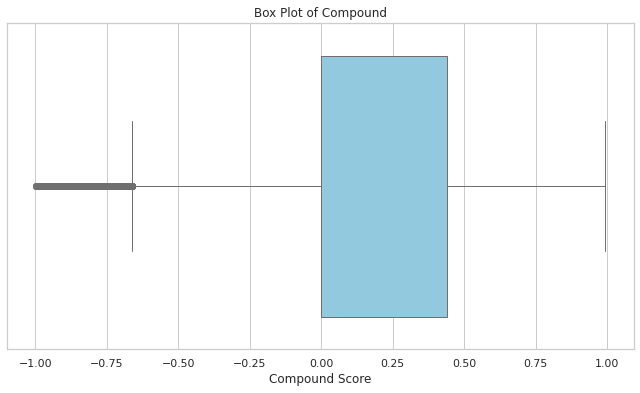

In [29]:

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['compound'], color='skyblue')

# Add title and labels
plt.title('Box Plot of Compound')
plt.xlabel('Compound Score')

plt.show()


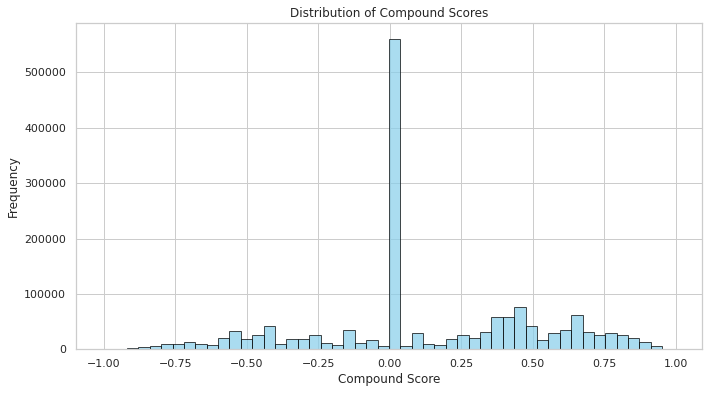

In [30]:


plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(data['compound'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

# Display grid lines
plt.grid(True)

plt.show()


In [31]:
# Set the 'Date' column as the index
data.set_index('Date', inplace=True)



In [32]:
data

,compound
Date,
2009-04-07 05:38:26,0.3612
2009-04-07 05:47:56,-0.5423
2009-04-07 06:17:54,-0.3252
2009-04-07 06:27:48,0.4019
2009-04-07 06:47:36,0.4019
...,...
2009-06-16 15:26:37,0.7351
2009-06-16 15:26:39,-0.4215
2009-06-16 15:32:48,0.3818


In [33]:
data.shape

(1598127, 1)

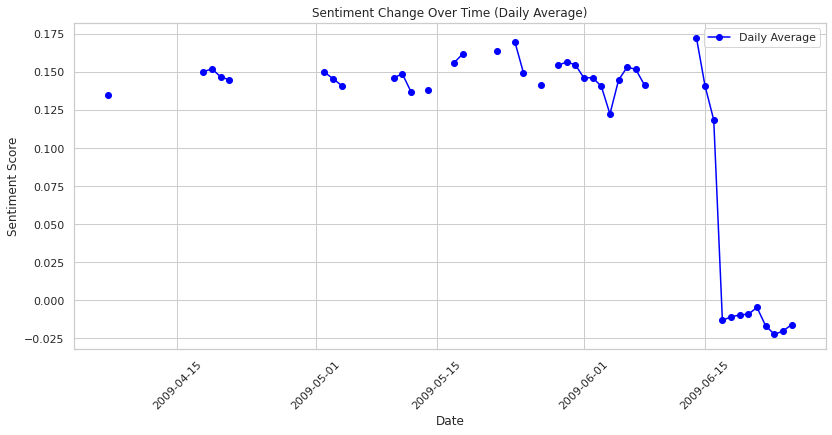

In [34]:
daily_data = data.resample('D').mean()

# Plot the daily average sentiment scores with a line graph
plt.figure(figsize=(12, 6))
plt.plot(daily_data['compound'], linestyle='-', marker='o', color='blue', label='Daily Average')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Change Over Time (Daily Average)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [35]:


# Identify the dates with missing values
missing_dates = daily_data[daily_data['compound'].isna()]

# Print the missing dates
print("Days with missing data:")
print(missing_dates.index)

# Count the number of missing days
num_missing = missing_dates.shape[0]
print(f"Number of missing days: {num_missing}")


Days with missing data:
DatetimeIndex(['2009-04-08', '2009-04-09', '2009-04-10', '2009-04-11',
               '2009-04-12', '2009-04-13', '2009-04-14', '2009-04-15',
               '2009-04-16', '2009-04-17', '2009-04-22', '2009-04-23',
               '2009-04-24', '2009-04-25', '2009-04-26', '2009-04-27',
               '2009-04-28', '2009-04-29', '2009-04-30', '2009-05-01',
               '2009-05-05', '2009-05-06', '2009-05-07', '2009-05-08',
               '2009-05-09', '2009-05-13', '2009-05-15', '2009-05-16',
               '2009-05-19', '2009-05-20', '2009-05-21', '2009-05-23',
               '2009-05-26', '2009-05-28', '2009-06-09', '2009-06-10',
               '2009-06-11', '2009-06-12', '2009-06-13'],
              dtype='datetime64[ns]', name='Date', freq=None)
Number of missing days: 39


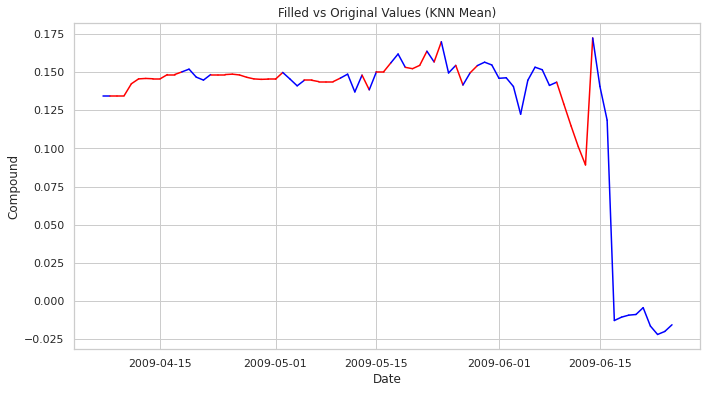

In [36]:

# Define a function for K-nearest neighbors mean imputation
def knn_mean_fill(ts, n):
    out = np.copy(ts)  # Copy the data
    is_filled = np.isnan(ts)  # Mark the positions of missing values
    for i, val in enumerate(ts):
        if np.isnan(val):  # Only replace missing values
            n_by_2 = np.ceil(n / 2)
            lower = max(0, int(i - n_by_2))
            upper = min(len(ts), int(i + n_by_2))
            ts_near = np.concatenate([ts[lower:i], ts[i + 1:upper]])  # Extract nearby non-missing values
            out[i] = np.nanmean(ts_near)  # Calculate the mean to fill in the missing value
    return out, is_filled

# Use K-nearest neighbors mean to fill in missing values in the data
filled_values, is_filled = knn_mean_fill(daily_data['compound'].values, 16)

# Update the original column with the filled data
daily_data['compound'] = filled_values

# Plotting the line graph
plt.figure(figsize=(10, 6))

# Plot in one line with the filled parts marked in red
for i in range(len(daily_data) - 1):
    color = 'red' if is_filled[i] else 'blue'
    plt.plot(daily_data['compound'].iloc[i:i+2], color=color)

plt.title("Filled vs Original Values (KNN Mean)")
plt.xlabel("Date")
plt.ylabel("Compound")
plt.grid(True)
plt.show()



In [37]:
daily_data.describe()

,compound
count,80.000000
mean,0.127151
std,0.051865
min,-0.022236
25%,0.138197
50%,0.145717
75%,0.149788
max,0.172615


In [38]:
#pip install statsmodels

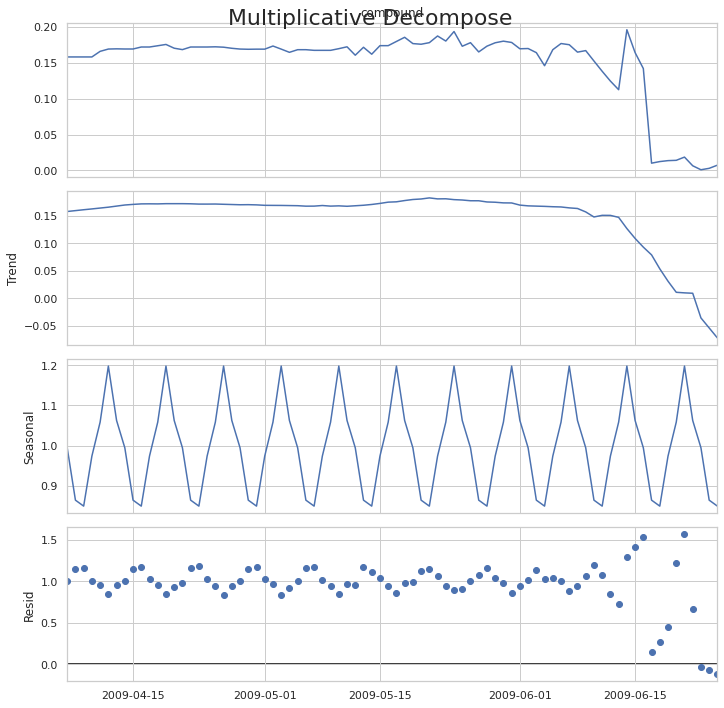

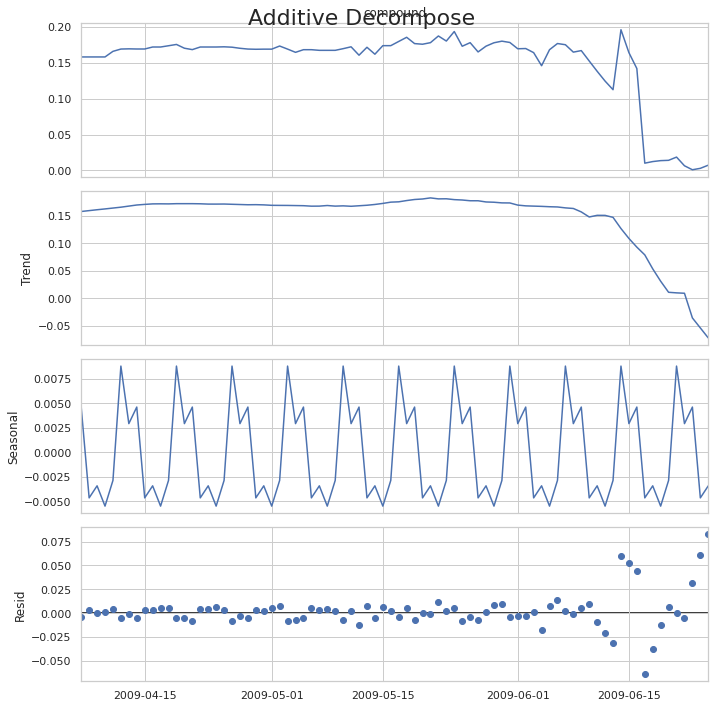

In [39]:
# Find the minimum value in the data
min_value = daily_data['compound'].min()

# Shift transformation to add a constant so that all data values are positive
shifted_data = daily_data['compound'] - min_value + 0.001  # Add a small constant to avoid zero values

# Perform seasonal decomposition on the shifted data
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(shifted_data, model='multiplicative', extrapolate_trend='freq')
result_add = seasonal_decompose(shifted_data, model='additive', extrapolate_trend='freq')

# Plot the decomposition results
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()



In [40]:
#pip install pmdarima

In [41]:
daily_data.describe()

,compound
count,80.000000
mean,0.127151
std,0.051865
min,-0.022236
25%,0.138197
50%,0.145717
75%,0.149788
max,0.172615


# 2 Model comperison  by Forcasting 7 Days

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=-314.189, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-317.115, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-314.634, Time=0.67 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-315.154, Time=0.48 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=-315.379, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=-316.080, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-316.505, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=-316.861, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=-317.888, Time=0.15 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=-315.968, Time=0.71 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=-315.139, Time=1.22 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=-314.105, Time=0.79 sec
 ARIMA(2,1,1)(0,1,0)[7]             : AIC=-319.142, Time=0.37 sec
 ARIMA(2,1,1)(1,1,0)[7]             : AIC=-317.426, Time=0.80 sec
 ARIMA(2,1,1)(0,1,1)[7]          

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               compound   No. Observations:                   73
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 195.516
Date:                Sun, 19 May 2024   AIC                           -383.033
Time:                        22:56:32   BIC                           -373.926
Sample:                    04-07-2009   HQIC                          -379.408
                         - 06-18-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0256      0.053      0.486      0.627      -0.078       0.129
ar.L2         -0.0204      0.086     -0.237      0.812      -0.189       0.148
ar.L3         -0.8431      0.073    -11.552      0.0

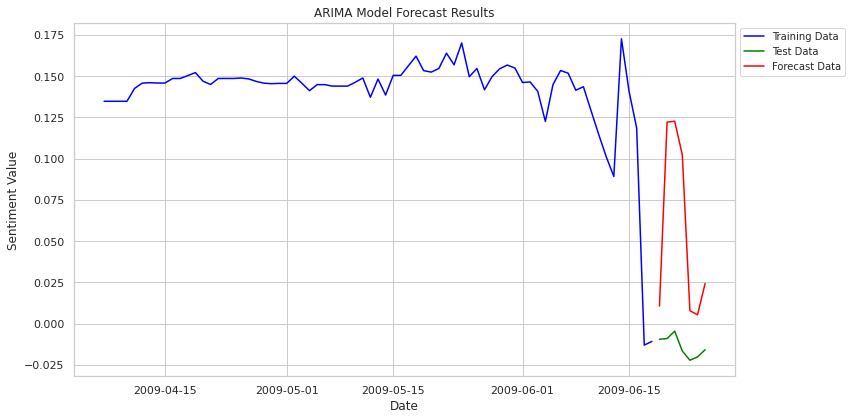

In [42]:


# Set random seed to ensure reproducibility
np.random.seed(42)

# Calculate the total length of the data
total_length = len(daily_data['compound'])

# Use all data except the last 7 points as the training set
train = daily_data['compound'].iloc[:-7]

# Use the last 7 data points as the test set
test = daily_data['compound'].iloc[-7:]

# Use auto_arima to find the best parameter combination
auto_model = auto_arima(train,
                        start_p=0, start_q=0, max_p=5, max_q=5,
                        m=7,
                        seasonal=True,  # Set to False if there is no seasonality
                        d=1, trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True,
                        random_state=42)  # Set random seed

# Get the best parameter combination
best_order = auto_model.order
print(f'Best ARIMA parameters: {best_order}')

# Fit an ARIMA model using the best parameters found
model = ARIMA(train, order=best_order)
results = model.fit()

# Print model summary
print(results.summary())

# Forecast future 7 data points using the trained model
forecast_steps = 7
forecast = results.forecast(steps=forecast_steps)

# Convert forecast to Pandas Series for easy comparison
forecast_series = pd.Series(forecast, index=test.index)

# Calculate forecast error metrics
mse = mean_squared_error(test, forecast_series)
print(f'MSE: {mse:.3f}')

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot training data, test data, and forecast data
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Test Data', color='green')
plt.plot(forecast_series, label='Forecast Data', color='red')

plt.title('ARIMA Model Forecast Results')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')

# Set the legend position and font size
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))

plt.grid(True)

plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=-314.189, Time=0.80 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-317.115, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-314.634, Time=0.69 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-315.154, Time=0.58 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=-315.379, Time=0.19 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=-316.080, Time=0.51 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-316.505, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=-316.861, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=-317.888, Time=0.13 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=-315.968, Time=0.84 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=-315.139, Time=1.32 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=-314.105, Time=0.99 sec
 ARIMA(2,1,1)(0,1,0)[7]             : AIC=-319.142, Time=0.35 sec
 ARIMA(2,1,1)(1,1,0)[7]             : AIC=-317.426, Time=0.91 sec
 ARIMA(2,1,1)(0,1,1)[7]          

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'



At iterate    5    f= -2.18619D+00    |proj g|=  1.22321D+00

At iterate   10    f= -2.23915D+00    |proj g|=  2.59877D+01

At iterate   15    f= -2.32913D+00    |proj g|=  1.85407D-01

At iterate   20    f= -2.33809D+00    |proj g|=  1.23494D+00

At iterate   25    f= -2.37450D+00    |proj g|=  2.41879D+00

At iterate   30    f= -2.38342D+00    |proj g|=  3.18088D-01

At iterate   35    f= -2.39372D+00    |proj g|=  4.27959D-01

At iterate   40    f= -2.39380D+00    |proj g|=  1.59540D-01

At iterate   45    f= -2.39450D+00    |proj g|=  2.77562D-01

At iterate   50    f= -2.40074D+00    |proj g|=  1.71218D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


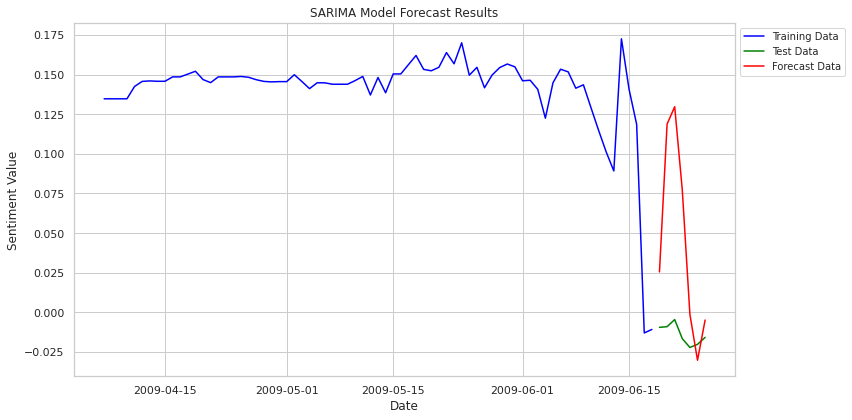

In [43]:

# Set random seed to ensure reproducibility
np.random.seed(42)

# Use all data except the last 7 points as the training set
train = daily_data['compound'].iloc[:-7]
# Use the last 7 data points as the test set
test = daily_data['compound'].iloc[-7:]

# Use auto_arima to find the best parameter combination
auto_model = auto_arima(train,
                        start_p=0, start_q=0, max_p=5, max_q=5,
                        m=7,
                        seasonal=True,  # Set to False if there is no seasonality
                        d=None, D=None,  # Automatically determine d and D
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True,
                        random_state=42)  # Set random seed

# Get the best parameter combination
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order
print(f'Best ARIMA parameters: {best_order}, Seasonal parameters: {best_seasonal_order}')

# Fit a SARIMA model using the best parameters found
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
results = model.fit()

# Print model summary
print(results.summary())

# Forecast future 7 data points using the trained model
forecast_steps = 7
forecast = results.get_forecast(steps=forecast_steps).predicted_mean

# Convert forecast to Pandas Series for easy comparison
forecast_series = pd.Series(forecast, index=test.index)

# Calculate forecast error metrics
mse = mean_squared_error(test, forecast_series)
print(f'MSE: {mse:.3f}')

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot training data, test data, and forecast data
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Test Data', color='green')
plt.plot(forecast_series, label='Forecast Data', color='red')

plt.title('SARIMA Model Forecast Results')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')

plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))

plt.grid(True)

plt.tight_layout()

plt.show()


In [44]:
#pip install skforecast --user

In [45]:
#! pip install shap

In [46]:
daily_data.describe()

,compound
count,80.000000
mean,0.127151
std,0.051865
min,-0.022236
25%,0.138197
50%,0.145717
75%,0.149788
max,0.172615


## Machine learning for forecasting

In order to apply machine learning models to forecasting problems, the time series has to be transformed into a matrix in which each value is related to the time window (lags) that precedes it.

In a time series context, a lag with respect to a time step  t  is defined as the values of the series at previous time steps. For example, lag 1 is the value at time step  t−1  and lag  m  is the value at time step  t−m .

In [47]:
# 定义分割点
steps = 7

# 分割数据集
data_train = daily_data[:-steps]
data_test  = daily_data[-steps:]

# 输出分割后的训练集和测试集的日期范围和长度
print(
    f"Train dates : {data_train.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)

Train dates : 2009-04-07 00:00:00 --- 2009-06-18 00:00:00  (n=73)
Test dates  : 2009-06-19 00:00:00 --- 2009-06-25 00:00:00  (n=7)


In [48]:
# Hyperparameters: grid search
# ==============================================================================
steps = 7
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags      = 12 # This value will be replaced in the grid search
             )

# Candidate values for lags
lags_grid = [12,13,14,17,20]

# Candidate values for regressor's hyperparameters
param_grid = {
    'n_estimators': [100,150],
     'max_depth': [10,11,12,13,14,15]
}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = data_train['compound'],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = steps,
                   refit              = False,
                   metric             = 'mean_squared_error',
                   initial_train_size = int(len(data_train)*0.8),
                   fixed_train_size   = False,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False ,
                   show_progress=False
               )

results_grid

print(results_grid.iloc[0])
print(results_grid.iloc[0]["lags"])

Number of models compared: 60.
`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 
  Parameters: {'max_depth': 11, 'n_estimators': 100}
  Backtesting metric: 0.003743550846807895

lags                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
lags_label            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
params                     {'max_depth': 11, 'n_estimators': 100}
mean_squared_error                                       0.003744
max_depth                                                      11
n_estimators                                                  100
Name: 14, dtype: object
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


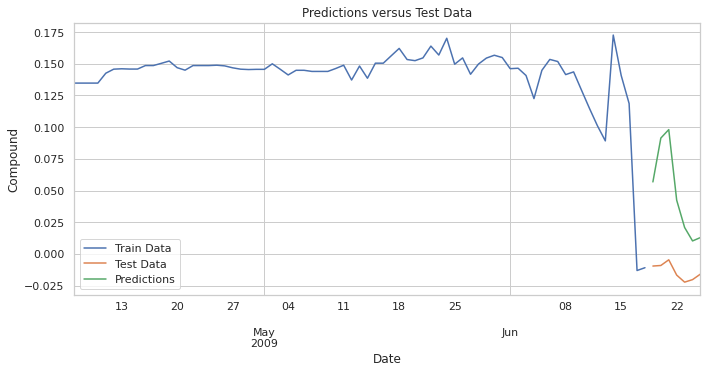

Test error (MSE): 0.004592025034761401
Test error (RMSE): 0.06776448210354301
Test error (MAE): 0.06156653883432225


/home/hduser/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=11,random_state=158)
forecaster = ForecasterAutoreg(
                 regressor = regressor,
                 lags      = 13
             )
forecaster.fit(y=data_train['compound'])

predictions = forecaster.predict(steps=steps)
# Plotting the composite data of the training and testing sets
fig, ax = plt.subplots(figsize=(10, 5))
data_train['compound'].plot(ax=ax, label='Train Data')
data_test['compound'].plot(ax=ax, label='Test Data')
predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions versus Test Data')
ax.set_xlabel('Date')
ax.set_ylabel('Compound')
ax.legend()
plt.show()

# Calculating multiple evaluation metrics
error_mse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )
error_rmse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions,
                squared = False
            )
error_mae = mean_absolute_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )

# Printing the evaluation results
print(f"Test error (MSE): {error_mse}")
print(f"Test error (RMSE): {error_rmse}")
print(f"Test error (MAE): {error_mae}")


In [50]:
forecaster = ForecasterAutoregDirect(
                 regressor     = Ridge(random_state=123),
                 steps         = 7,
                 lags          = 20,
                 transformer_y = StandardScaler()
             )
forecaster

from skforecast.exceptions import LongTrainingWarning
warnings.simplefilter('ignore', category=LongTrainingWarning)

forecaster = ForecasterAutoregDirect(
                 regressor     = Ridge(random_state=123),
                 steps         = 7,
                 lags          = 12, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )
param_grid = {'alpha': np.logspace(-5, 5, 10)}
lags_grid = [5, 12, 20,21,22,23]

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = data_train['compound'],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 7,
                   refit              = False,
                   metric             = 'mean_squared_error',
                   initial_train_size = int(len(data_train)*0.45),
                   fixed_train_size   = False,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False,
                   show_progress      = False
                   
               )

results_grid.head()

Number of models compared: 60.
`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'alpha': 0.021544346900318846}
  Backtesting metric: 0.0011093354658956145



,lags,lags_label,params,mean_squared_error,alpha
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",{'alpha': 0.021544346900318846},0.001109,0.021544
14,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",{'alpha': 0.2782559402207126},0.001146,0.278256
0,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]",{'alpha': 1e-05},0.001177,0.000010
1,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]",{'alpha': 0.0001291549665014884},0.001177,0.000129
2,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]",{'alpha': 0.0016681005372000592},0.001177,0.001668


/home/hduser/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test error (MSE): 0.02118601836090859
Test error (RMSE): 0.145554176720933
Test error (MAE): 0.11399590311304546


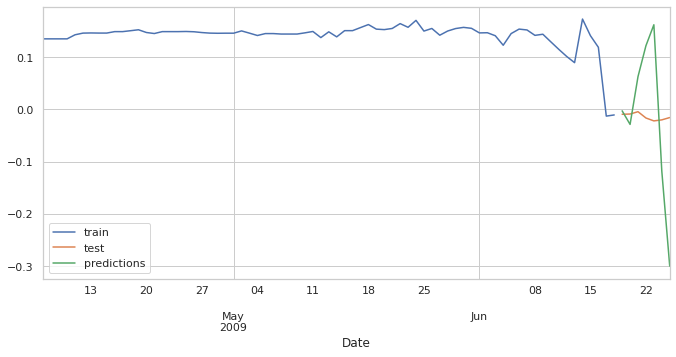

In [51]:

forecaster = ForecasterAutoregDirect(
                 regressor     = Ridge(  alpha =0.021544346900318846,random_state=123),
                 steps         = 7,
                 lags          = 12, # This value will be replaced in the grid search
                 transformer_y = StandardScaler(),
               
                  )
forecaster

forecaster.fit(y=data_train['compound'])
# Predictions
# ==============================================================================
predictions = forecaster.predict()

# Plot predictions versus test data
# ==============================================================================
fig, ax = plt.subplots(figsize=(10,5))
data_train['compound'].plot(ax=ax, label='train')
data_test['compound'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();


error_mse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )
error_rmse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions,
                squared = False
            )
error_mae = mean_absolute_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )



print(f"Test error (MSE): {error_mse}")
print(f"Test error (RMSE): {error_rmse}")
print(f"Test error (MAE): {error_mae}")

In [52]:
daily_data.describe()

,compound
count,80.000000
mean,0.127151
std,0.051865
min,-0.022236
25%,0.138197
50%,0.145717
75%,0.149788
max,0.172615


In [53]:
def create_dataset(dataset, look_back=7, steps_ahead=7):
    dataX, dataY = [], []
    if isinstance(dataset, pd.DataFrame):  # Check if the dataset is a DataFrame
        dataset = dataset.values  # Convert to NumPy array to simplify indexing operations
    for i in range(len(dataset) - look_back - steps_ahead + 1):
        a = dataset[i:(i + look_back), 0]  # Get the input window
        dataX.append(a)
        y = dataset[i + look_back:i + look_back + steps_ahead, 0]  # Get the sequence of the next 7 time steps
        dataY.append(y)
    return np.array(dataX), np.array(dataY)


In [54]:
# Splitting the data
n = daily_data.shape[0]

train_data = daily_data.iloc[:n-19]  # Use data from the first entry to the nineteenth last as the training set
test_data = daily_data.iloc[-19:]    # Use the last 19 entries as the test set


# Reshape into X=t and Y=t+1
look_back = 12
steps_ahead = 7
trainX, trainY = create_dataset(train_data, look_back, steps_ahead)
testX, testY = create_dataset(test_data, look_back, steps_ahead)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

trainY = np.reshape(trainY, (trainY.shape[0], 7))
testY =  np.reshape(testY, (testY.shape[0], 7))

# Ensure the data shapes are correct
print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)


trainX shape: (43, 12, 1)
trainY shape: (43, 7)
testX shape: (1, 12, 1)
testY shape: (1, 7)


In [55]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def build_Bidirectional_GRU_model(hp):
    model = Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)

    for i in range(num_layers):
        return_sequences = True if i < num_layers - 1 else False
        activation_choice = hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid', 'selu'])
        units = hp.Int('units_l' + str(i), min_value=32, max_value=128, step=32)

    
        if i == 0:
            model.add(Bidirectional(GRU(units=units, activation=activation_choice, return_sequences=return_sequences),
                                    input_shape=(trainX.shape[1], trainX.shape[2])))
        else:
            model.add(Bidirectional(GRU(units=units, activation=activation_choice, return_sequences=return_sequences)))

        
        if hp.Boolean('dropout_l' + str(i)):
            model.add(Dropout(rate=hp.Float('dropout_rate_l' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(7))  # Output layer size corresponds to the forecast horizon.
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')
    return model

# Configuring the tuner with the model-building function, optimization objective, and other parameters.
tuner = kt.RandomSearch(
    build_Bidirectional_GRU_model,
    objective='val_loss',
    max_trials=50,  # Maximum number of model configurations to try.
    executions_per_trial=1,  # Number of times to run each model configuration.
    directory='my_dir',  # Directory to store the search logs.
    project_name='gru_tuning_12'
)

# Early stopping to halt the training when validation loss is not improving.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Searching for the best hyperparameters.
tuner.search(trainX, trainY, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Retrieving the best model found during the search.
best_model = tuner.get_best_models(num_models=1)[0]

# Printing a summary of the best model.
best_model.summary()

# Evaluating the best model on the test data.
test_loss = best_model.evaluate(testX, testY)
print("Test loss:", test_loss)

# Printing the best hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Learning rate: {best_hps.get('learning_rate')}")
for i in range(best_hps.get('num_layers')):
    print(f"Units in layer {i}: {best_hps.get(f'units_l{i}')}")
    print(f"Activation function in layer {i}: {best_hps.get(f'activation_{i}')}")
    if best_hps.get(f'dropout_l{i}'):
        print(f"Dropout in layer {i}: {best_hps.get(f'dropout_l{i}')}")
        print(f"Dropout rate in layer {i}: {best_hps.get(f'dropout_rate_l{i}')}")
    else:
        print(f"No dropout applied in layer {i}")


Reloading Tuner from my_dir/gru_tuning_12/tuner0.json


/home/hduser/.local/lib/python3.10/site-packages/keras_tuner/src/engine/oracle.py:102: DeprecationWarning: currentThread() is deprecated, use current_thread() instead
  thread_name = threading.currentThread().getName()
/home/hduser/.local/lib/python3.10/site-packages/keras_tuner/src/engine/oracle.py:102: DeprecationWarning: getName() is deprecated, get the name attribute instead
  thread_name = threading.currentThread().getName()
/home/hduser/.local/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/hduser/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  trackable.load_own_variables(weights_store.ge

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 12, 192)        │        57,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 192)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 192)            │       130,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         1,351 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,623 (1.10 MB)

 Trainable params: 287,623 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0213
Test loss: 0.02133551798760891
Learning rate: 0.005493060411680128
Units in layer 0: 96
Activation function in layer 0: selu
Dropout in layer 0: True
Dropout rate in layer 0: 0.30000000000000004
Units in layer 1: 64
Activation function in layer 1: selu
No dropout applied in layer 1
Units in layer 2: 96
Activation function in layer 2: relu
No dropout applied in layer 2


In [56]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def build_Bidirectional_LSTM_model(hp):
    model = Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)

    for i in range(num_layers):
        return_sequences = True if i < num_layers - 1 else False
        activation_choice = hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid', 'selu'])

        units = hp.Int('units_l' + str(i), min_value=32, max_value=128, step=32)

        if i == 0:
            model.add(Bidirectional(LSTM(units=units, activation=activation_choice, return_sequences=return_sequences),
                                    input_shape=(trainX.shape[1], trainX.shape[2])))
        else:
            model.add(Bidirectional(LSTM(units=units, activation=activation_choice, return_sequences=return_sequences)))

        if hp.Boolean('dropout_l' + str(i)):
            model.add(Dropout(rate=hp.Float('dropout_rate_l' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(7))
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')
    return model

tuner = kt.RandomSearch(
    build_Bidirectional_LSTM_model,
    objective='val_loss',
    max_trials=50,  
    executions_per_trial=1,  
    directory='my_dir',  
    project_name='lstm_tuning_12'
)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


tuner.search(trainX, trainY, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)


best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


test_loss = best_model.evaluate(testX, testY)
print("Test loss:", test_loss)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Learning rate: {best_hps.get('learning_rate')}")
for i in range(best_hps.get('num_layers')):
    print(f"Units in layer {i}: {best_hps.get(f'units_l{i}')}")
    print(f"Activation function in layer {i}: {best_hps.get(f'activation_{i}')}")
    if best_hps.get(f'dropout_l{i}'):
        print(f"Dropout in layer {i}: {best_hps.get(f'dropout_l{i}')}")
        print(f"Dropout rate in layer {i}: {best_hps.get(f'dropout_rate_l{i}')}")
    else:
        print(f"No dropout applied in layer {i}")


Reloading Tuner from my_dir/lstm_tuning_12/tuner0.json


/home/hduser/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 12, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,511 (521.53 KB)

 Trainable params: 133,511 (521.53 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step - loss: 0.0266
Test loss: 0.026585232466459274
Learning rate: 0.005629018689069258
Units in layer 0: 64
Activation function in layer 0: sigmoid
Dropout in layer 0: True
Dropout rate in layer 0: 0.1
Units in layer 1: 64
Activation function in layer 1: tanh
No dropout applied in layer 1


In [57]:

n = daily_data.shape[0]

train_data = daily_data.iloc[:n-14]  # Use data from the first entry to the fourteenth last as the training set
test_data = daily_data.iloc[-14:]    # Use the last 14 entries as the test set


# Reshape into X=t and Y=t+1
look_back = 7
steps_ahead = 7
trainX, trainY = create_dataset(train_data, look_back, steps_ahead)
testX, testY = create_dataset(test_data, look_back, steps_ahead)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

trainY = np.reshape(trainY, (trainY.shape[0], 7))
testY = np.reshape(testY, (testY.shape[0], 7))

# Ensure the data shapes are correct
print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)


trainX shape: (53, 7, 1)
trainY shape: (53, 7)
testX shape: (1, 7, 1)
testY shape: (1, 7)


In [58]:
type(trainX)

numpy.ndarray

In [59]:
trainY.shape

(53, 7)

In [60]:
trainX

array([[[0.13473238],
        [0.13473238],
        [0.13473238],
        [0.13473238],
        [0.1425213 ],
        [0.14572328],
        [0.14601386]],

       [[0.13473238],
        [0.13473238],
        [0.13473238],
        [0.1425213 ],
        [0.14572328],
        [0.14601386],
        [0.14579687]],

       [[0.13473238],
        [0.13473238],
        [0.1425213 ],
        [0.14572328],
        [0.14601386],
        [0.14579687],
        [0.14579687]],

       [[0.13473238],
        [0.1425213 ],
        [0.14572328],
        [0.14601386],
        [0.14579687],
        [0.14579687],
        [0.14856299]],

       [[0.1425213 ],
        [0.14572328],
        [0.14601386],
        [0.14579687],
        [0.14579687],
        [0.14856299],
        [0.14856299]],

       [[0.14572328],
        [0.14601386],
        [0.14579687],
        [0.14579687],
        [0.14856299],
        [0.14856299],
        [0.15031022]],

       [[0.14601386],
        [0.14579687],
        [0.14579687]

In [61]:
#pip install keras_tuner

In [62]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def build_Bidirectional_GRU_model(hp):
    model = Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)

    for i in range(num_layers):
        return_sequences = True if i < num_layers - 1 else False
        activation_choice = hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid', 'selu'])

        units = hp.Int('units_l' + str(i), min_value=32, max_value=128, step=32)

        if i == 0:
            model.add(Bidirectional(GRU(units=units, activation=activation_choice, return_sequences=return_sequences),
                                    input_shape=(trainX.shape[1], trainX.shape[2])))
        else:
            model.add(Bidirectional(GRU(units=units, activation=activation_choice, return_sequences=return_sequences)))

        if hp.Boolean('dropout_l' + str(i)):
            model.add(Dropout(rate=hp.Float('dropout_rate_l' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(7))
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')
    return model

# Set up the tuner and search space
tuner = kt.RandomSearch(
    build_Bidirectional_GRU_model,
    objective='val_loss',
    max_trials=50,  # Set the maximum number of search experiments
    executions_per_trial=1,  # Number of executions per trial
    directory='my_dir',  # Directory for storing search logs
    project_name='gru_tuning2'
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(trainX, trainY, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Evaluate the best model
test_loss = best_model.evaluate(testX, testY)
print("Test loss:", test_loss)

# Print the best hyperparameters

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Units in layer {i}: {best_hps.get(f'units_l{i}')}")
    print(f"Activation function in layer {i}: {best_hps.get(f'activation_{i}')}")
    if best_hps.get(f'dropout_l{i}') is not None:
        print(f"Dropout in layer {i}: {best_hps.get(f'dropout_l{i}')}")
        print(f"Dropout rate in layer {i}: {best_hps.get(f'dropout_rate_l{i}')}")

print(f"Learning rate: {best_hps.get('learning_rate')}")


Reloading Tuner from my_dir/gru_tuning2/tuner0.json


/home/hduser/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 64)             │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,175 (28.03 KB)

 Trainable params: 7,175 (28.03 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - loss: 0.0200
Test loss: 0.019972089678049088
Best number of layers: 1
Units in layer 0: 32
Activation function in layer 0: relu
Dropout in layer 0: True
Dropout rate in layer 0: 0.30000000000000004
Learning rate: 0.003373201432675782


In [63]:


seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def build_Bidirectional_LSTM_model(hp):
    model = Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)

    for i in range(num_layers):
        return_sequences = True if i < num_layers - 1 else False
        activation_choice = hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid', 'selu'])

        units = hp.Int('units_l' + str(i), min_value=32, max_value=128, step=32)

        if i == 0:
            model.add(Bidirectional(LSTM(units=units, activation=activation_choice, return_sequences=return_sequences),
                                    input_shape=(trainX.shape[1], trainX.shape[2])))
        else:
            model.add(Bidirectional(LSTM(units=units, activation=activation_choice, return_sequences=return_sequences)))

        if hp.Boolean('dropout_l' + str(i)):
            model.add(Dropout(rate=hp.Float('dropout_rate_l' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(7))
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')
    return model


tuner = kt.RandomSearch(
    build_Bidirectional_LSTM_model,
    objective='val_loss',
    max_trials=50,  
    executions_per_trial=1,  
    directory='my_dir',  
    project_name='lstm_tuning2'
)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


tuner.search(trainX, trainY, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)


best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


test_loss = best_model.evaluate(testX, testY)
print("Test loss:", test_loss)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Units in layer {i}: {best_hps.get(f'units_l{i}')}")
    print(f"Activation function in layer {i}: {best_hps.get(f'activation_{i}')}")
    if best_hps.get(f'dropout_l{i}') is not None:
        print(f"Dropout in layer {i}: {best_hps.get(f'dropout_l{i}')}")
        print(f"Dropout rate in layer {i}: {best_hps.get(f'dropout_rate_l{i}')}")

print(f"Learning rate: {best_hps.get('learning_rate')}")



Reloading Tuner from my_dir/lstm_tuning2/tuner0.json


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 64)             │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,159 (35.78 KB)

 Trainable params: 9,159 (35.78 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 0.0210
Test loss: 0.021003413945436478
Best number of layers: 1
Units in layer 0: 32
Activation function in layer 0: relu
Dropout in layer 0: True
Dropout rate in layer 0: 0.30000000000000004
Learning rate: 0.003373201432675782


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 64)             │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,159 (35.78 KB)

 Trainable params: 9,159 (35.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0206WARNING:tensorflow:5 out of the last 5 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x717a5710a320> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


tensorflow WARNING 5 out of the last 5 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x717a5710a320> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - loss: 0.0192 - val_loss: 0.0135
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0135 - val_loss: 0.0087
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0089 - val_loss: 0.0048
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0028 - val_loss: 7.5484e-04
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0020 - val_loss: 6.7812e-04
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0015 - val_loss: 2.8010e-04
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0010 - val_loss: 2.3374e-04
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0010 - val_loss: 3.

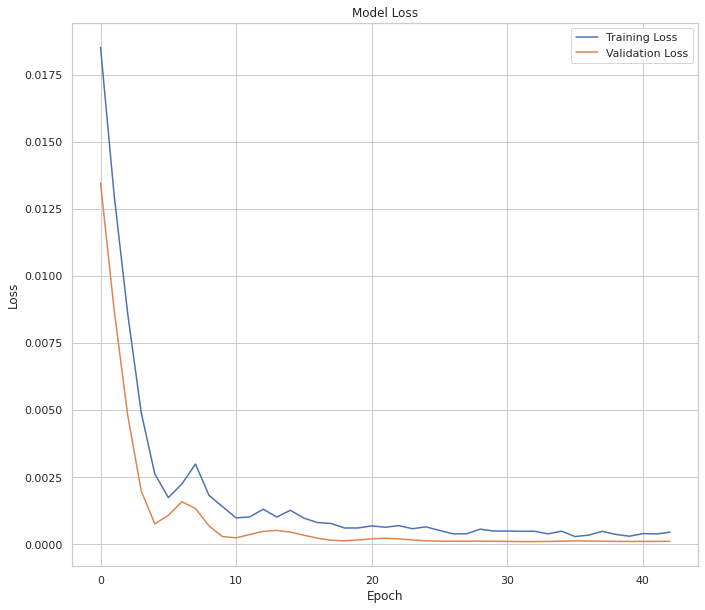

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Test MSE: 0.0205471270335507


In [64]:

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


model = Sequential()
model.add(Bidirectional(LSTM(units=32, activation='relu', return_sequences=False),
                        input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.3))
model.add(Dense(7))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.003373201432675782),
              loss='mean_squared_error')

model.summary()


early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(trainX, trainY, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

predictions = model.predict(testX)
mse = mean_squared_error(testY, predictions)
print("Test MSE:", mse)


/home/hduser/.local/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 64)             │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,175 (28.03 KB)

 Trainable params: 7,175 (28.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step - loss: 0.0174 - val_loss: 0.0105
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0110 - val_loss: 0.0056
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0033 - val_loss: 4.1878e-04
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0022 - val_loss: 5.7883e-04
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0027 - val_loss: 9.7200e-04
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0022 - val_loss: 5.8759e-04
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0017 - val_loss: 3.1574e-04
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0014 - val_loss: 3.1479e-04
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0010 - val_loss: 4.6853e-04
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss

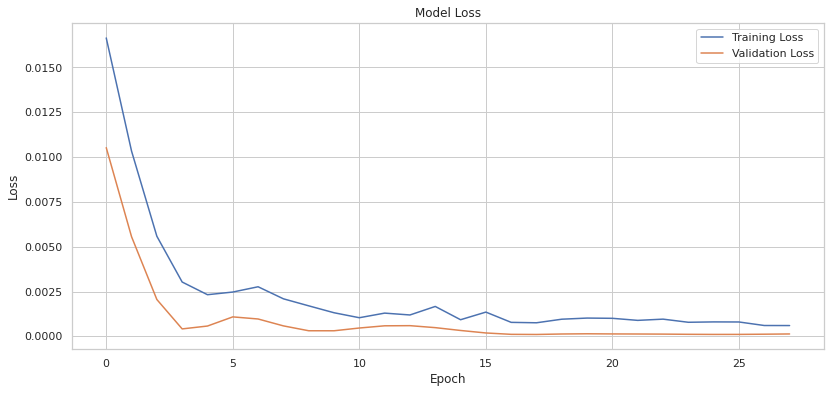

In [65]:

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)


def build_best_model():
    model = Sequential([
        Bidirectional(GRU(32, activation='relu'), input_shape=(trainX.shape[1], trainX.shape[2])),
        Dropout(0.3),
        Dense(7)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.003373201432675782),
                  loss='mean_squared_error')
    return model

model = build_best_model()


model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(trainX, trainY, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)

test_loss = model.evaluate(testX, testY)
print("Test loss:", test_loss)

predictions = model.predict(testX)

mse_value = mean_squared_error(testY, predictions)
print("Test MSE:", mse_value)



plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


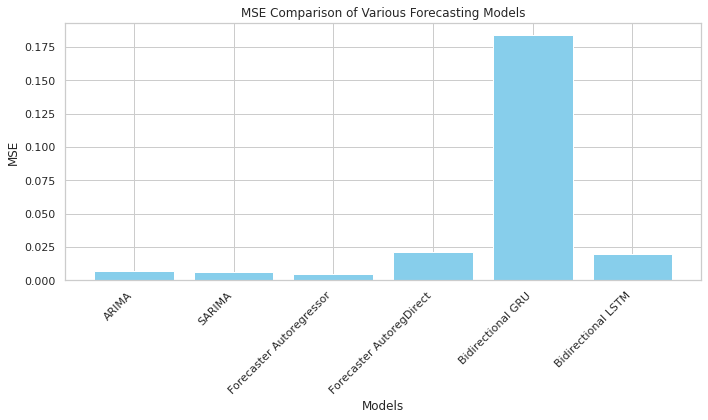

In [66]:

models = ['ARIMA', 'SARIMA', 'Forecaster Autoregressor', 'Forecaster AutoregDirect',
          'Bidirectional GRU', 'Bidirectional LSTM']
mse_values = [0.007, 0.006, 0.0045, 0.021, 0.184, 0.020]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison of Various Forecasting Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels


plt.show()



# 3 Using the best model for final predictions.

Train dates : 2009-04-07 00:00:00 --- 2009-06-18 00:00:00  (n=73)
Test dates  : 2009-06-19 00:00:00 --- 2009-06-25 00:00:00  (n=7)
Number of models compared: 60.
`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 
  Parameters: {'max_depth': 11, 'n_estimators': 100}
  Backtesting metric: 0.003743550846807895

lags                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
lags_label            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
params                     {'max_depth': 11, 'n_estimators': 100}
mean_squared_error                                       0.003744
max_depth                                                      11
n_estimators                                                  100
Name: 14, dtype: object
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


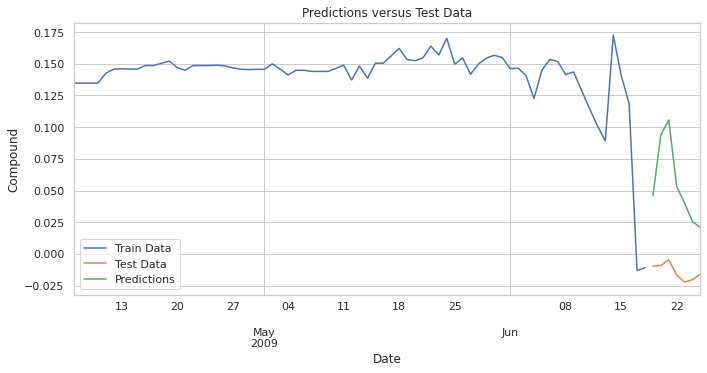

Test error (MSE): 0.005432027794074776
Test error (RMSE): 0.07370229164737536
Test error (MAE): 0.06901884557466546


/home/hduser/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:

steps = 7

data_train = daily_data[:-steps]
data_test  = daily_data[-steps:]


print(
    f"Train dates : {data_train.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)

# Hyperparameters: grid search
# ==============================================================================
steps = 7
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags      = 12 # This value will be replaced in the grid search
             )

# Candidate values for lags
lags_grid = [12,13,14,17,20]

# Candidate values for regressor's hyperparameters
param_grid = {
    'n_estimators': [100,150],
     'max_depth': [10,11,12,13,14,15]
}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = data_train['compound'],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = steps,
                   refit              = False,
                   metric             = 'mean_squared_error',
                   initial_train_size = int(len(data_train)*0.8),
                   fixed_train_size   = False,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False ,
                   show_progress=False
               )

results_grid

print(results_grid.iloc[0])
print(results_grid.iloc[0]["lags"])

regressor = RandomForestRegressor(n_estimators=100, max_depth=11,random_state=123)
forecaster = ForecasterAutoreg(
                 regressor = regressor,
                 lags      = 13
             )
forecaster.fit(y=data_train['compound'])

predictions = forecaster.predict(steps=steps)


fig, ax = plt.subplots(figsize=(10, 5))
data_train['compound'].plot(ax=ax, label='Train Data')
data_test['compound'].plot(ax=ax, label='Test Data')
predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions versus Test Data')
ax.set_xlabel('Date')
ax.set_ylabel('Compound')
ax.legend()
plt.show()



error_mse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )
error_rmse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions,
                squared = False
            )
error_mae = mean_absolute_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )


print(f"Test error (MSE): {error_mse}")
print(f"Test error (RMSE): {error_rmse}")
print(f"Test error (MAE): {error_mae}")

In [68]:
df = daily_data

In [69]:
forecaster.fit(y=df['compound'])  
 
predictions_7D = forecaster.predict(steps= 7)

In [70]:
predictions_7D

2009-06-26   -0.010135
2009-06-27   -0.004815
2009-06-28   -0.017152
2009-06-29   -0.018505
2009-06-30   -0.018737
2009-07-01   -0.018154
2009-07-02   -0.017855
Freq: D, Name: pred, dtype: float64

In [71]:

steps = 3

data_train = daily_data[:-steps]
data_test  = daily_data[-steps:]


print(
    f"Train dates : {data_train.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)


# ==============================================================================
steps = 3
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags      = 12 # This value will be replaced in the grid search
             )

# Candidate values for lags
lags_grid = [9,10,11,12,13]

# Candidate values for regressor's hyperparameters
param_grid = {
    'n_estimators': [50,100,150],
     'max_depth': [10,11,12,13,14,15]
}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = data_train['compound'],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = steps,
                   refit              = False,
                   metric             = 'mean_squared_error',
                   initial_train_size = int(len(data_train)*0.8),
                   fixed_train_size   = False,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False ,
                   show_progress=False
               )

results_grid

print(results_grid.iloc[0])
print(results_grid.iloc[0]["lags"])

Train dates : 2009-04-07 00:00:00 --- 2009-06-22 00:00:00  (n=77)
Test dates  : 2009-06-23 00:00:00 --- 2009-06-25 00:00:00  (n=3)
Number of models compared: 90.
`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 150}
  Backtesting metric: 0.009275885661321013

lags                         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lags_label                   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
params                {'max_depth': 10, 'n_estimators': 150}
mean_squared_error                                  0.009276
max_depth                                                 10
n_estimators                                             150
Name: 20, dtype: object
[ 1  2  3  4  5  6  7  8  9 10]


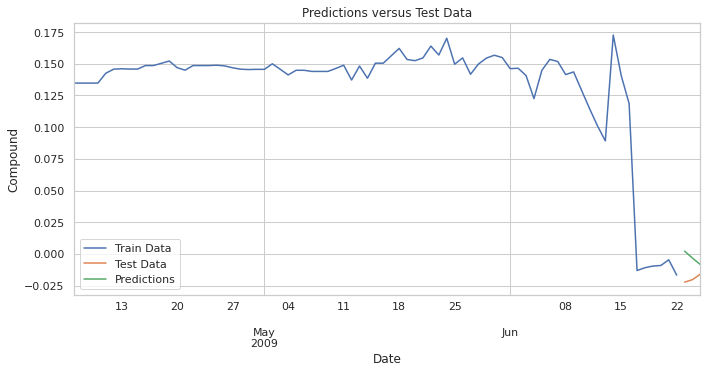

Test error (MSE): 0.00031346105375170763
Test error (RMSE): 0.017704831367502703
Test error (MAE): 0.016271014796240997


/home/hduser/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [72]:
regressor = RandomForestRegressor(n_estimators=150, max_depth=10,random_state=123)
forecaster = ForecasterAutoreg(
                 regressor = regressor,
                 lags      = 10
             )
forecaster.fit(y=data_train['compound'])

predictions = forecaster.predict(steps=steps)


fig, ax = plt.subplots(figsize=(10, 5))
data_train['compound'].plot(ax=ax, label='Train Data')
data_test['compound'].plot(ax=ax, label='Test Data')
predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions versus Test Data')
ax.set_xlabel('Date')
ax.set_ylabel('Compound')
ax.legend()
plt.show()



error_mse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )
error_rmse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions,
                squared = False
            )
error_mae = mean_absolute_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )



print(f"Test error (MSE): {error_mse}")
print(f"Test error (RMSE): {error_rmse}")
print(f"Test error (MAE): {error_mae}")

In [73]:
forecaster.fit(y=df['compound'])  
 
predictions_3D = forecaster.predict(steps= 3)

In [74]:
predictions_3D

2009-06-26   -0.015673
2009-06-27   -0.016077
2009-06-28   -0.016810
Freq: D, Name: pred, dtype: float64

In [75]:

steps = 1


data_train = daily_data[:-steps]
data_test  = daily_data[-steps:]

print(
    f"Train dates : {data_train.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)


# ==============================================================================
steps = 1
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags      = 12 
             )

# Candidate values for lags
lags_grid = [9,10,11,12,13]

# Candidate values for regressor's hyperparameters
param_grid = {
    'n_estimators': [50,100,150],
     'max_depth': [10,11,12,13,14,15]
}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = data_train['compound'],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = steps,
                   refit              = False,
                   metric             = 'mean_squared_error',
                   initial_train_size = int(len(data_train)*0.8),
                   fixed_train_size   = False,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False ,
                   show_progress=False
               )

results_grid

print(results_grid.iloc[0])
print(results_grid.iloc[0]["lags"])

Train dates : 2009-04-07 00:00:00 --- 2009-06-24 00:00:00  (n=79)
Test dates  : 2009-06-25 00:00:00 --- 2009-06-25 00:00:00  (n=1)
Number of models compared: 90.
`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 11, 'n_estimators': 50}
  Backtesting metric: 0.012494356938117738

lags                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lags_label                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
params                {'max_depth': 11, 'n_estimators': 50}
mean_squared_error                                 0.012494
max_depth                                                11
n_estimators                                             50
Name: 21, dtype: object
[ 1  2  3  4  5  6  7  8  9 10]


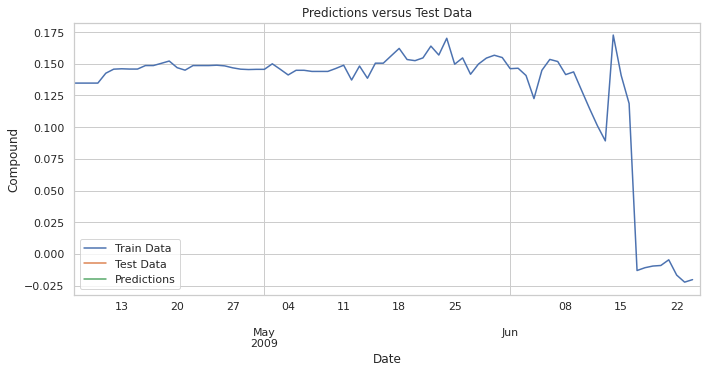

Test error (MSE): 9.649013189518649e-06
Test error (RMSE): 0.003106286076574186
Test error (MAE): 0.003106286076574186


/home/hduser/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [76]:
regressor = RandomForestRegressor(n_estimators=50, max_depth=11,random_state=123)
forecaster = ForecasterAutoreg(
                 regressor = regressor,
                 lags      = 10
             )
forecaster.fit(y=data_train['compound'])

predictions = forecaster.predict(steps=steps)


fig, ax = plt.subplots(figsize=(10, 5))
data_train['compound'].plot(ax=ax, label='Train Data')
data_test['compound'].plot(ax=ax, label='Test Data')
predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions versus Test Data')
ax.set_xlabel('Date')
ax.set_ylabel('Compound')
ax.legend()
plt.show()



error_mse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )
error_rmse = mean_squared_error(
                y_true = data_test['compound'],
                y_pred = predictions,
                squared = False
            )
error_mae = mean_absolute_error(
                y_true = data_test['compound'],
                y_pred = predictions
            )



print(f"Test error (MSE): {error_mse}")
print(f"Test error (RMSE): {error_rmse}")
print(f"Test error (MAE): {error_mae}")

In [77]:
forecaster.fit(y=df['compound'])  
 
predictions_1D = forecaster.predict(steps= 1)

In [78]:

predictions_1D

2009-06-26   -0.016262
Freq: D, Name: pred, dtype: float64

In [79]:
df1 = daily_data

In [80]:
df1

,compound
Date,
2009-04-07,0.134732
2009-04-08,0.134732
2009-04-09,0.134732
2009-04-10,0.134732
2009-04-11,0.142521
...,...
2009-06-21,-0.004615
2009-06-22,-0.016684
2009-06-23,-0.022236


In [81]:
df1 = pd.concat([df1, predictions_1D.rename('compound')], axis=0)  

print(df1.tail())

            compound
2009-06-22 -0.016684
2009-06-23 -0.022236
2009-06-24 -0.020251
2009-06-25 -0.015861
2009-06-26 -0.016262


In [82]:
df2 = daily_data

In [83]:
df2 = pd.concat([df2, predictions_3D.rename('compound')], axis=0)  


print(df2.tail())

            compound
2009-06-24 -0.020251
2009-06-25 -0.015861
2009-06-26 -0.015673
2009-06-27 -0.016077
2009-06-28 -0.016810


In [84]:
df3 = daily_data

In [85]:
df3 = pd.concat([df3, predictions_7D.rename('compound')], axis=0)  


print(df3.tail())

            compound
2009-06-28 -0.017152
2009-06-29 -0.018505
2009-06-30 -0.018737
2009-07-01 -0.018154
2009-07-02 -0.017855


In [86]:
def classify_sentiment(compound_score, pos_threshold=0.01, neg_threshold=-0.01):
    if compound_score >= pos_threshold:
        return "Positive"
    elif compound_score <= neg_threshold:
        return "Negative"
    else:
        return "Neutral"

In [87]:
df1['Sentiment'] = df1['compound'].apply(classify_sentiment)
df1.drop(columns = ['compound'],inplace =True)
print(df1)

           Sentiment
2009-04-07  Positive
2009-04-08  Positive
2009-04-09  Positive
2009-04-10  Positive
2009-04-11  Positive
...              ...
2009-06-22  Negative
2009-06-23  Negative
2009-06-24  Negative
2009-06-25  Negative
2009-06-26  Negative

[81 rows x 1 columns]


In [88]:
df2['Sentiment'] = df2['compound'].apply(classify_sentiment)
df2.drop(columns = ['compound'],inplace =True)

print(df2)

           Sentiment
2009-04-07  Positive
2009-04-08  Positive
2009-04-09  Positive
2009-04-10  Positive
2009-04-11  Positive
...              ...
2009-06-24  Negative
2009-06-25  Negative
2009-06-26  Negative
2009-06-27  Negative
2009-06-28  Negative

[83 rows x 1 columns]


In [89]:
df3['Sentiment'] = df3['compound'].apply(classify_sentiment)
df3.drop(columns = ['compound'],inplace =True)

print(df3)

           Sentiment
2009-04-07  Positive
2009-04-08  Positive
2009-04-09  Positive
2009-04-10  Positive
2009-04-11  Positive
...              ...
2009-06-28  Negative
2009-06-29  Negative
2009-06-30  Negative
2009-07-01  Negative
2009-07-02  Negative

[87 rows x 1 columns]


In [90]:
#pip install dash

In [91]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd


# 4 Dashboard  Design

In [92]:
# Import required libraries


# Example data preparation, adjust according to your actual data
# Assuming df1, df2, df3 have been loaded and properly set up
dataframes = {
    '1-Day Forecast': df1,
    '3-Day Forecast': df2,
    '7-Day Forecast': df3
}

# Initialize Dash app
app = dash.Dash(__name__)

# Dash layout setup
app.layout = html.Div([
    html.H1("TweetsSentimentForecast"),
    dcc.Dropdown(
        id='time_frame',
        options=[{'label': k, 'value': k} for k in dataframes.keys()],
        value='1-Day Forecast'
    ),
    dcc.Graph(id='sentiment_graph')
])

# Mapping sentiments to numerical values for plotting
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Callback function to update the chart
@app.callback(
    Output('sentiment_graph', 'figure'),
    [Input('time_frame', 'value')]
)
def update_graph(selected_time_frame):
    df = dataframes[selected_time_frame]
    # Mark the last few days as predictions
    last_days = {'1-Day Forecast': 1, '3-Day Forecast': 3, '7-Day Forecast': 7}[selected_time_frame]
    df['Type'] = 'Actual'
    df.loc[df.tail(last_days).index, 'Type'] = 'Predicted'
    
    # Prepare data for plotting
    df['Value'] = df['Sentiment'].map(sentiment_mapping)
    
    # Create the chart with actual data
    trace_actual = go.Scatter(
        x=df[df['Type'] == 'Actual'].index,
        y=df[df['Type'] == 'Actual']['Value'],
        mode='lines',
        name='Actual',
        marker=dict(color=df[df['Type'] == 'Actual']['Value'].map({0: 'red', 1: 'gray', 2: 'green'}))
    )
    # Create the chart with predicted data
    trace_predicted = go.Scatter(
        x=df[df['Type'] == 'Predicted'].index,
        y=df[df['Type'] == 'Predicted']['Value'],
        mode='lines',
        name='Predicted',
        line=dict(dash='dash'),
        marker=dict(color=df[df['Type'] == 'Predicted']['Value'].map({0: 'pink', 1: 'lightgray', 2: 'lightgreen'}))
    )
    
    # Define the layout with a custom background color
    layout = go.Layout(
        title='',
        yaxis={'title': 'Sentiment', 'tickvals': [0, 1, 2], 'ticktext': ['Negative', 'Neutral', 'Positive']},
        plot_bgcolor='#f4f4f2'  # Light grey background color
    )
    
    return {'data': [trace_actual, trace_predicted], 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
